#[Your_name]

<h1 style="text-align: center;">Text Classification<h1>

Prepare libraries

In [146]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, AveragePooling1D, Flatten
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
import re
import numpy as np
from cleantext import clean
from arabicstopwords.stopwords_lexicon import stopwords_lexicon
import arabicstopwords.arabicstopwords as stop_words
import nltk
from nltk.stem.isri import ISRIStemmer
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk import bigrams, trigrams
from collections import Counter
from snowballstemmer import stemmer
from tashaphyne.stemming import ArabicLightStemmer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
from matplotlib.font_manager import FontProperties
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from nltk.tokenize import word_tokenize


download 

Download data

In [147]:
# !wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [148]:
# !pip install Arabic-Stopwords
# 2.2 nltk.download('punkt') # open vpn
# 2.3 !pip install arabic-reshaper
# 2.4 nltk.download('stopwords')
# 3.8 !pip install snowballstemmer
# 3.8 !pip install Tashaphyne
# 3.8 !pip install -U farasapy

In [149]:
# !unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [150]:
# your code here


In [151]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [152]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
validation_file_path = 'val.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
validation_data = pd.read_csv(validation_file_path)

# print("number of data in train data : ",len(train_data))
# print("number of data in test data : ",len(test_data))
# print("number of data in validation data : ",len(validation_data))

In [153]:
# train_data.head(10)

In [154]:
# test_data.head(10)

In [155]:
# validation_data.head(10)

In [156]:
#drop_duplicates يزيل الصفوف المتكرره
#dropna يحذف الصفوف المكررة
test_data=test_data.drop_duplicates().dropna()
train_data=train_data.drop_duplicates().dropna()
validation_data=validation_data.drop_duplicates().dropna()
# print("number of data in train data after cleaning : ",len(train_data))
# print("number of data in test data after cleaning : ",len(test_data))
# print("number of data in validation data after cleaning : ",len(validation_data))

In [157]:
# train_data.head(10)

In [158]:
# test_data.head(10)

In [159]:
# validation_data.head(10)

## [1.2]

In [160]:
def unify_specialty(name):
    name = re.sub(r"[^\w\s]", " ", name)  # يزيل الرموز الترقيمية
    name = re.sub(r"\s+", " ", name).strip()  # يزيل الفراغات المتكرره #strip يزيل الفراغات يلي بالبداية والنهاية
    name =re.sub("[\_\-]"," ",name)
    return name

train_data['label']=train_data['label'].apply(unify_specialty)
test_data['label']=test_data['label'].apply(unify_specialty)
validation_data['label']=validation_data['label'].apply(unify_specialty)   


In [161]:
# x=set(train_data['label'])
# x

In [162]:
Dictionary_of_diseases= {
    'أمراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'امراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'أمراض الدم': 'أمراض الدم',
    'الدم': 'أمراض الدم',
    'امراض الدم': 'أمراض الدم',
    'أمراض الغدد الصماء': 'أمراض الغدد الصماء',
    'الغدد الصماء': 'أمراض الغدد الصماء',
    'امراض الغدد الصماء': 'أمراض الغدد الصماء',
    'مرض السكري': 'مرض السكري',
    'السكري': 'مرض السكري',
    'الاورام الخبيثة والحميدة':'الأورام الخبيثة والحميدة'

}

def Unification_name_of_diseases(c):
    c=c.map(Dictionary_of_diseases).fillna(c)
    return c

In [163]:
train_data['label']=Unification_name_of_diseases(train_data['label'])
test_data['label']=Unification_name_of_diseases(test_data['label'])
validation_data['label']=Unification_name_of_diseases(validation_data['label'])

In [164]:
# x=set(train_data['label'])
# x

# Question [2]: Text Analysis

## [2.1] 


In [165]:
# train_data

In [166]:
# Train data

# عدد الأجوبة الخاصة بأمراض الدم :
answers_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['answer'].tolist())
# print(answers_len_in_blood_diseases)

# عدد الأسئلة الخاصة بأمراض الدم :
questions_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['question'].tolist())
# print(questions_len_in_blood_diseases)


# عدد الداتا الخاصة بأمراض الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الدم'])
print('عدد الداتا الخاصة بأمراض الدم:',total_blood_diseases_len)

# عدد الداتا في أمراض الجهاز التنفسي :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الجهاز التنفسي'])
print('عدد الداتا الخاصة بأمراض الجهاز التنفسي:',total_blood_diseases_len)

# غدد الداتا في أمراض الغدد الصماء :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الغدد الصماء'])
print('عدد الداتا الخاصة بأمراض الغدد الصماء:',total_blood_diseases_len)

# عدد  الداتا ارتفاع ضغط الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='ارتفاع ضغط الدم'])
print('عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم:',total_blood_diseases_len)

# عدد الداتا في الأورام الخبيثة والحميدة :
total_blood_diseases_len = len(train_data[train_data['label']=='الأورام الخبيثة والحميدة'])
print('عدد الداتا الخاصة بالأورام الخبيثة والحميدة:',total_blood_diseases_len)

# عدد الداتا في جراحة العظام
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة العظام'])
print('عدد الداتا الخاصة بجراحةالعظام:',total_blood_diseases_len)

# عدد الداتا في الجراحة العامة
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة عامة'])
print('عدد الداتا الخاصة بالجراحة العامة:',total_blood_diseases_len)

# عدد الداتا في مرض السكري
total_blood_diseases_len = len(train_data[train_data['label']=='مرض السكري'])
print('عدد الداتا الخاصة بمرض السكري:',total_blood_diseases_len)


عدد الداتا الخاصة بأمراض الدم: 1398
عدد الداتا الخاصة بأمراض الجهاز التنفسي: 3676
عدد الداتا الخاصة بأمراض الغدد الصماء: 5752
عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم: 2537
عدد الداتا الخاصة بالأورام الخبيثة والحميدة: 6449
عدد الداتا الخاصة بجراحةالعظام: 2211
عدد الداتا الخاصة بالجراحة العامة: 6307
عدد الداتا الخاصة بمرض السكري: 4268


In [167]:
# # Drawing pie chart:
# # ملاحظة بالعربي طلع الخط مفشكل ف تمت الكتابة بالانكليزي



# data = {
#     'الاختصاص': ['أمراض الدم', 'أمراض الجهاز التنفسي', 'أمراض الغدد الصماء','أمراض ارتفاع ضغط الدم','الأمراض الخبيثة والحميدة','جراحةالعظام','الجراحة العامة','مرض السكري'],
#     'عدد النصوص': [2153, 6002, 9417,4190,10711,2641,10548,7096]
# }

# data


# df = pd.DataFrame(data)

# # print(df)
# arabic_font = FontProperties(fname='font/NotoNaskhArabic-VariableFont_wght.ttf') 

# df['الاختصاص'] = [get_display(arabic_reshaper.reshape(label)) for label in df['الاختصاص']]
# plt.figure(figsize=(8, 8))
# plt.pie(df['عدد النصوص'], labels=df['الاختصاص'], autopct='%1.1f%%', startangle=140)
# plt.title(get_display(arabic_reshaper.reshape('توزيع النصوص حسب الاختصاص')), fontproperties=arabic_font)
# plt.show()

# # import pandas as pd
# # import matplotlib.pyplot as plt

# # data = {
# #     'Specialization': ['Blood Diseases', 'Respiratory System Diseases', 'Endocrine Diseases', 'Hypertension', 'Malignant and Benign Diseases', 'Orthopedic Surgery', 'General Surgery', 'Diabetes'],
# #     'Number of Texts': [1398, 3676, 5752, 2537, 6449, 2211, 6307, 4268]
# # }

# # df = pd.DataFrame(data)

# # print(df)

# # plt.figure(figsize=(8, 8))
# # plt.pie(df['Number of Texts'], labels=df['Specialization'], autopct='%1.1f%%', startangle=140)
# # plt.title('Distribution of Texts by Specialization')
# # plt.show()


## [2.2] 

In [168]:
def delete_repeated_letter(text):
    # cleaned_text = re.sub(r'(.)\1{2,}', r'\1', text)
    cleaned_text = re.sub(r'([^\w\s\.])\1+', r'\1', text)
    cleaned_text = re.sub(r'(\.\s*)\1+$', r'\1', cleaned_text)
    return cleaned_text

def handle_connected_words(tokenized):
    # Handle connected words with '-'
    result_tokens = []
    for token in tokenized:
        # Split connected words with '-'
        result_tokens.extend(token.split('-'))
    return result_tokens


def filter_text(list):
    list_of_phrases =[]
    all_tokens = []
    for sentence in list:
        tokenizer = RegexpTokenizer(r'\b\d+\b|\b[^\d\W_]{2,}\b|[^\d\W_]+(?:-[^\d\W_]+)?|\S')
        tokenized = tokenizer.tokenize(delete_repeated_letter(sentence))
        tokenized = handle_connected_words(tokenized)

        # Remove '-' and '/' and one-letter words from each token
        # cleaned_tokens = [token for token in tokenized if len(token) > 1 and token not in ['-', '/']]
        # cleaned_tokens = [token if len(token) > 1 or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        cleaned_tokens = [token if (token.isalpha() and len(token) > 1) or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        combined_phrase = ' '.join(cleaned_tokens)
        list_of_phrases.append(combined_phrase)

    for phrase in list_of_phrases:
        tokens = nltk.word_tokenize(phrase)
        all_tokens.append(tokens)
        
    return all_tokens



In [169]:
train_data_answers_list = train_data['answer'].values
answers = filter_text(train_data_answers_list)
flattened_answers = [item for sublist in answers for item in sublist]
print(len(flattened_answers))


1645245


In [170]:
train_data_questions_list = train_data['question'].values
questions = filter_text(train_data_questions_list)
flattened_quesions = [item for sublist in questions for item in sublist]
print(len(flattened_quesions))

801979


In [171]:
# حساب عدد الكلمات الكلي :
total_words_len = len(flattened_quesions) + len(flattened_answers)
print(total_words_len)

2447224


In [172]:
# حساب عدد الكلمات الفريدة :
total_unique_words=len(set(flattened_quesions+flattened_answers))
print("عدد الكلمات الفريدة:", total_unique_words)

عدد الكلمات الفريدة: 94614


## [2.3] 

In [173]:
# WCD=dict()
# train_data_answers_list = flattened_answers
# train_data_questions_list = flattened_quesions
# train_data_list=train_data_answers_list+train_data_questions_list
# answers_text = ' '.join(train_data_list)
# reshaped_text = arabic_reshaper.reshape(answers_text)
# arabic_text = get_display(reshaped_text)
# wordcloud = WordCloud(font_path='font/NotoNaskhArabic-VariableFont_wght.ttf', background_color='white').generate(arabic_text)
# WCD=wordcloud.words_
# plt.figure(figsize=(50, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## [2.4] 

In [174]:
def tokenized_text(text):
    # allWords = nltk.tokenize.word_tokenize(text)

    allWordDist = nltk.FreqDist(w for w in text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in text if w not in stopwords)  
    mostCommon= allWordDist.most_common(15)
    print('أكثر 15 كلمة مكررة:',mostCommon)
    leastCommon = allWordDist.most_common()[:-11:-1]
    print('أقل 10 كلمة مكررة:', leastCommon)
    bigram_freq = nltk.FreqDist(bigrams(text))
    most_common_bigrams = bigram_freq.most_common(10)
    print('أكثر 10 ثنائيات مكررة في النص:',most_common_bigrams)
    trigram_freq = nltk.FreqDist(trigrams(text))
    most_common_trigrams = trigram_freq.most_common(10)
    print('أكثر 10 ثلاثيات كلمات مكررة في النص:',most_common_trigrams)
    collocations_bigram = nltk.collocations.BigramCollocationFinder.from_words(text)
    most_common_collocations_bigram = collocations_bigram.nbest(nltk.collocations.BigramAssocMeasures.likelihood_ratio, 10)
    print('أكثر 10 ثنائيات كلمات مهمة في النص:',most_common_collocations_bigram)
    collocations_trigram = nltk.collocations.TrigramCollocationFinder.from_words(text)
    most_common_collocations_trigram = collocations_trigram.nbest(nltk.collocations.TrigramAssocMeasures.likelihood_ratio, 10)
    print('أكثر 10 ثلاثيات كلمات مهمة في النص:',most_common_collocations_trigram)  
    print('========================================================================================================================================================================================')  


    


# tokenized_text('tony botros is tony the tony best best best tony botros in in in the whole world tony botros')
# tokenized_text(['طوني','طوني','بطرس','هو','طوني','هو','بطرس','ال','الأفضل'])
# tokenized_text(['لدي', 'جرح', 'فوق', 'حاجبي', 'و', 'تمت', 'عملية', 'الخياطة', 'ثم', 'نزع', 'الغرزات', 'بشكل', 'عادي', 'لكن', 'مر', 'اسبوع', 'على', 'ذلك', 'و', 'مازال', 'هناك', 'الم', 'و', 'تطلب', 'شديد', 'في', 'المنطقة', 'لدرجة', 'اني', 'لا', 'استطيع', 'رفع', 'حاجبي', 'ابدا', 'إضافة', 'لوجود', 'انتفاخ', 'هل', 'هدا', 'طبيعي', 'ام', 'يمكن', 'ان', 'يكون', 'خلل', 'و', 'إن', 'كان', 'كذلك', 'ما', 'هو'])
tokenized_text(answers[0])

أكثر 15 كلمة مكررة: [('المريض', 2), ('قد', 2), ('يناسب', 2), ('الدكتور', 2), ('يزن', 2), ('علي', 2), ('خليف', 2), ('و', 2), ('لكل', 1), ('علاج', 1), ('ايجابيته', 1), ('وسلبياته', 1), ('والتي', 1), ('تعتمد', 1), ('على', 1)]
أقل 10 كلمة مكررة: [('الصماء', 1), ('الغدد', 1), ('الانسولين', 1), ('ايضا', 1), ('جلوكوفانس', 1), ('الدواء', 1), ('عيوب', 1), ('مميزات', 1), ('هي', 1), ('ما', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('الدكتور', 'يزن'), 2), (('يزن', 'علي'), 2), (('علي', 'خليف'), 2), (('لكل', 'علاج'), 1), (('علاج', 'ايجابيته'), 1), (('ايجابيته', 'وسلبياته'), 1), (('وسلبياته', 'والتي'), 1), (('والتي', 'تعتمد'), 1), (('تعتمد', 'على'), 1), (('على', 'حالة'), 1)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('الدكتور', 'يزن', 'علي'), 2), (('يزن', 'علي', 'خليف'), 2), (('لكل', 'علاج', 'ايجابيته'), 1), (('علاج', 'ايجابيته', 'وسلبياته'), 1), (('ايجابيته', 'وسلبياته', 'والتي'), 1), (('وسلبياته', 'والتي', 'تعتمد'), 1), (('والتي', 'تعتمد', 'على'), 1), (('تعتمد', 'على', 'حالة'), 1), (('على', 'حالة', 'المريض

In [175]:
#الشرح

In [176]:
# هاد التابع لمرق كل اختصاص وجيب منو الكلمات كلا متل مو مطلوب ب 2.4
def all_tokinized_text(specialized):
    filtered_questions = filter_text(train_data[train_data['label']==specialized]['question'].values)
    filtered_answers = filter_text(train_data[train_data['label']==specialized]['answer'].values)
    list = filtered_questions + filtered_answers
    flattened_list = [item for sublist in list for item in sublist]
    # flattened_list
    tokenized_text(flattened_list)
    

In [177]:
# all_tokinized_text('أمراض الدم')

In [178]:
# all_tokinized_text('أمراض الجهاز التنفسي')

In [179]:
# all_tokinized_text('أمراض الغدد الصماء')

In [180]:
# all_tokinized_text('ارتفاع ضغط الدم')

In [181]:
# all_tokinized_text('الأورام الخبيثة والحميدة')

In [182]:
# all_tokinized_text('جراحة العظام')

In [183]:
# all_tokinized_text('جراحة عامة')

In [184]:
# all_tokinized_text('مرض السكري')

In [185]:
# # على كل الداتا تبع الترين:
# filtered_questions = filter_text(train_data['question'].values)
# filtered_answers = filter_text(train_data['answer'].values)
# list = filtered_questions + filtered_answers
# flattened_list = [item for sublist in list for item in sublist]
# flattened_list
# tokenized_text(flattened_list)


In [186]:
#الشرح

## [2.5] 

In [187]:
train_data['all_word']=train_data['answer']+train_data['question']
train_data_list=train_data['all_word'].values
all_word = filter_text(train_data_list)

In [188]:
flattened_all_word = [item for sublist in all_word for item in sublist]
train_data['length_of_sentinse']=train_data['all_word'].apply(len)
# train_data['length_of_sentinse']

In [189]:
w=[]
for i in all_word:
    w.append(set(i))
train_data['unique_words']=w
train_data['number_of_unique_words']=train_data['unique_words'].apply(len)

In [190]:
def histogram(length_of_sentinse,number_of_unique_words):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    # plt.bar(number_of_unique_words, length_of_sentinse, color='blue', alpha=0.7)
    plt.hist(length_of_sentinse, label='length_of_sentinse',edgecolor='black', linewidth=1.2,bins=30, alpha=0.5)
    plt.hist(number_of_unique_words, label='number_of_unique_words',edgecolor='black', linewidth=1.2,bins=30, alpha=0.5)
    plt.title('histogram')
    plt.xlabel('length_of_sentinse')
    plt.ylabel('number_of_unique_words')
    # plt.tight_layout()
    plt.legend()
    plt.show()

In [191]:
# لكل النص
# histogram(train_data['length_of_sentinse'],train_data['number_of_unique_words'])

In [192]:
# # أمراض الجهاز التنفسي
# histogram(train_data[train_data['label']=='أمراض الجهاز التنفسي']['length_of_sentinse'],train_data[train_data['label']=='أمراض الجهاز التنفسي']['number_of_unique_words'])

In [193]:
# # أمراض الدم
# histogram(train_data[train_data['label']=='أمراض الدم']['length_of_sentinse'],train_data[train_data['label']=='أمراض الدم']['number_of_unique_words'])

In [194]:
# # أمراض الغدد الصماء
# histogram(train_data[train_data['label']=='أمراض الغدد الصماء']['length_of_sentinse'],train_data[train_data['label']=='أمراض الغدد الصماء']['number_of_unique_words'])

In [195]:
# # ارتفاع ضغط الدم
# histogram(train_data[train_data['label']=='ارتفاع ضغط الدم']['length_of_sentinse'],train_data[train_data['label']=='ارتفاع ضغط الدم']['number_of_unique_words'])

In [196]:
# # الأورام الخبيثة والحميدة
# histogram(train_data[train_data['label']=='الأورام الخبيثة والحميدة']['length_of_sentinse'],train_data[train_data['label']=='الأورام الخبيثة والحميدة']['number_of_unique_words'])

In [197]:
# # جراحة العظام
# histogram(train_data[train_data['label']=='جراحة العظام']['length_of_sentinse'],train_data[train_data['label']=='جراحة العظام']['number_of_unique_words'])

In [198]:
# # جراحة عامة
# histogram(train_data[train_data['label']=='جراحة عامة']['length_of_sentinse'],train_data[train_data['label']=='جراحة عامة']['number_of_unique_words'])

In [199]:
# # مرض السكري
# histogram(train_data[train_data['label']=='مرض السكري']['length_of_sentinse'],train_data[train_data['label']=='مرض السكري']['number_of_unique_words'])

# Question [3]: Text Cleaning and Normalization

## [3.1] 


In [200]:
# train_data
# clean_tweet = re.sub(r'^RT(\s)+|https?\S+|#|@\S+', '', tweet) ## من أجل أزالت 
#r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
def remove_links(text):
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    return clean_text


In [201]:
# remove_links('https://chat.openai.com/c/dc21a08a-5be6-42e3-a6e4-0c1d26791a46 hi')

## [3.2] 

In [202]:
import re

def remove_doctors_prefix(text):
    pattern = r'\b(?:الدكتور(?:ة)?)\s+(?:الصيدلاني(?:ة)?)?\s*(?:([\u0600-\u06FF]+)\s*[\u0600-\u06FF]+\s*([\u0600-\u06FF]+))\b'

    def replacer(match):
        full_name = match.group(1)
        first_name = full_name.split()[0]
        return f'د.{first_name}'

    result = re.sub(pattern, replacer, text)

    return result


In [203]:
texts = train_data[train_data['label']=='أمراض الدم']['answer']
# texts.apply(remove_doctors_prefix)[0]
# for text in texts[:5]:
#     # print(text)
#     print(remove_doctors_prefix(text))
#     print("=================================================================")

## [3.3] 

In [204]:
def remove_sentences_after_doctor(text):
    result = re.sub(r'(الدكتور(?:ة)[^\n]*\n|د\.[^\n]*\n)([^\n]*\n){0,6}', r'\1', text)
    return result

# for text in texts[:5]:
#     print(remove_sentences_after_doctor(text))

## [3.4] 

In [205]:
def remove_duplicate_letters_except_alif(text):
    pattern = re.compile(r'(?:(?<!ا)ا(?!ا)|(.)(?:\1)+)', re.UNICODE) # بشلي كلشي أحرف مكررة وخاصة الألف مابكررها اكتر من مرة
    result = pattern.sub(lambda x: x.group(1) if x.group(1) else 'ا', text)
    return result

# for text in texts[:5]:
#     print(remove_duplicate_letters_except_alif(text))

## [3.5]

### [3.5.1] 

In [206]:
# هاد بيقلب لل 1و2و3و4و....
def convert_numbers_to_arabic_v2(text):
    digit_mapping = {'٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4', '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'}
    english_text = re.sub(r'[٠-٩]', lambda x: digit_mapping[x.group()], text)

    return english_text


# for text in texts[:5]:
#     print(convert_numbers_to_arabic_v2(text))

In [207]:
# هاد بيلقلب لل ١,٢,٣,٤
def convert_numbers_to_arabic(text):
    digit_mapping = {'0': '٠', '1': '١', '2': '٢', '3': '٣', '4': '٤', '5': '٥', '6': '٦', '7': '٧', '8': '٨', '9': '٩'}
    arabic_text = re.sub(r'[0-9]', lambda x: digit_mapping[x.group()], text)

    return arabic_text


# for text in texts[:5]:
#     print(convert_numbers_to_arabic(text))

### [3.5.2] 

In [208]:
def standardize_numbers(text, replacement_symbol='T'):
    digit_pattern = r'[0-9٠-٩]+'
    standardized_text = re.sub(digit_pattern, lambda x: replacement_symbol, text)

    return standardized_text


# for text in texts[:5]:
#     print(standardize_numbers(text))

### [3.5.3] 

In [209]:
def remove_numbers(text):
    digit_pattern = r'\d+'
    
    text_without_numbers = re.sub(digit_pattern, '', text)

    return text_without_numbers

# for text in texts[:5]:
#     print(remove_numbers(text))

### [3.5.4]

In [210]:
texts = train_data[train_data['label']=='أمراض الجهاز التنفسي']['answer'].values

def remove_dates_and_times(text):
    date_time_patterns = [
        r'\d{4}-\d{2}-\d{2}\s+\d{1,2}:\d{2}:\d{2}'  # Match dates and times like 2015-01-04 20:08:51
        # r'\d{1,2}/\d{1,2}/\d{2,4}',         # Match dates like 12/31/2022
        # r'\d{1,2}-\d{1,2}-\d{2,4}',         # Match dates like 12-31-2022
        # r'\d{1,2}:\d{2}:\d{2}'               # Match times like 12:34:56
        # r'\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s*\d{2,4}',  # Match dates like 31 Dec 2022
        # r'\d{1,2}:\d{2}\s*(?:AM|PM|am|pm)?',  # Match times like 12:34 AM
    ]

    for pattern in date_time_patterns:
        text = re.sub(pattern, '', text)

    return text

# for text in texts[:5]:
#     print(remove_dates_and_times(text))

## [3.6] 

### [3.6.1] 

In [211]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [212]:
def remove_punctuation(text):
    text=re.sub(r'[!\"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~،؛؟ـ]',' ',text)
    return text

# for text in texts[:5]:
#     print(remove_punctuation(text))

### [3.6.2] 

In [213]:
def keep_arabic_punctuations_numbers(text):
    text= re.sub(r'[^\u0600-\u06FF0-9،؛؟ـ!\"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~]', ' ', text)
    return text

# for text in texts[:5]:
#     print(keep_arabic_punctuations_numbers(text))

## [3.7] 

In [214]:
stop_word=set(stop_words.classed_stopwords_list())
Some_stop_words_we_need=["قبلما","بعدما","فقط","مازال","ليست","ليس","ليسا","لسنا",
                         "لسن","لازالت","مساء","صباح","قبل","بعد","إياك","إياكن",
                         "إياكما","إياكم","لم","عدا","إلا","د","كلا","عامة","لا",
                         "حبذا","أقل","أكثر"]
Some_stop_words_dont_we_need=['عليكم','السلام','انا','أرجو','الرد','المزيد','إقرأ']
for word in Some_stop_words_we_need:
    if word in stop_word:
        stop_word.remove(word)

for word in Some_stop_words_we_need:
    if word is not stop_word:
        stop_word.add(word)

def remove_stop_words(text):
    text =re.sub("[\_\-\/]"," ",text)
    text=word_tokenize(text)
    text=[w for w in text if not w in stop_word]
    return text

# for text in texts[:5]:
#     print(remove_stop_words(text))

ملاحــــــــــــــــــظه


## [3.8] 

In [215]:
# def stem_arabic_words_farasa(text):
#     stemmer = FarasaStemmer()
#     text=stemmer.stem(text)
#     return text

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_farasa(text)
# print(stemmed_text)

In [216]:
# def stem_arabic_words_tashaphyne(text):
#     stemmer = ArabicLightStemmer()
#     words = text.split()
#     stemmed_words = [stemmer.light_stem(word) for word in words]
#     return ' '.join(stemmed_words)

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_tashaphyne(text)
# print(stemmed_text)

In [217]:
def stem_arabic_words_ISRIStemmer(text):
    stemmer = ISRIStemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_ISRIStemmer(text)
# print(stemmed_text)

In [218]:
def stem_arabic_words_snowballstemmer(text):
    ar_stemmer = stemmer("arabic")
    words = text.split()
    stemmed_words = [ar_stemmer.stemWord(word) for word in words]
    return ' '.join(stemmed_words)

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_snowballstemmer(text)
# print(stemmed_text)

In [219]:
# for text in texts[:5]:
#     print(stem_arabic_words_snowballstemmer(text))

In [220]:
# for text in texts[:5]:
#     print(stem_arabic_words_tashaphyne(text))

In [221]:
# for text in texts[:5]:
#     print(stem_arabic_words_farasa(text))

In [222]:
# for text in texts[:5]:
#     print(stem_arabic_words_ISRIStemmer(text))

## [3.9] 

### [3.9.1] 

In [223]:
def unify_hamzat(text):
    unified_text = re.sub(r'[ءؤئ]', 'ء', text)
    return unified_text

In [224]:
# for text in texts[:5]:
#     print(unify_hamzat(text))

### [3.9.2] 

In [225]:
def unify_Alfat(text):
    unified_text = re.sub(r'[أإآ]', 'أ', text)
    return unified_text

In [226]:
# for text in texts[:5]:
#     print(unify_Alfat(text))

### [3.9.3] 

In [227]:
def remove_tatweel(text):
    text =re.sub( r'ـ', '', text)
    return text

In [228]:
# for text in texts[:5]:
#     print(remove_tatweel(text))

### [3.9.4] 

In [229]:
def remove_arabic_diacritics(text):
    text=re.sub(r'[\u064B-\u065F]', '', text)
    return text


In [230]:
# for text in texts[:5]:
#     print(remove_arabic_diacritics(text))

## [3.10] 

In [231]:
def remove_space(text):
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [232]:
# for text in texts[:5]:
#     print(remove_space(text))

## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1] 


In [233]:
def preparing_training_data(text):
    text_after_cleaning_links = remove_links(text)
    text_after_removing_doctors_prefix = remove_doctors_prefix(text_after_cleaning_links)
    text_after_removing_specialization = remove_sentences_after_doctor(text_after_removing_doctors_prefix)
    text_after_removing_doublication_chars = remove_duplicate_letters_except_alif(text_after_removing_specialization)
    text_after_removing_date_and_time = remove_dates_and_times(text_after_removing_doublication_chars)
    text_after_removing_numbers = remove_numbers(text_after_removing_date_and_time)
    text_after_removing_non_arabic_words = keep_arabic_punctuations_numbers(text_after_removing_numbers)
    # text after removing stop words
    text_after_unify_hamzat = unify_hamzat(text_after_removing_non_arabic_words)
    text_after_unify_alafat = unify_Alfat(text_after_unify_hamzat)
    text_after_removing_tatwel = remove_tatweel(text_after_unify_alafat)
    text_after_removing_tashkel = remove_arabic_diacritics(text_after_removing_tatwel)
    text_after_removing_spaces_and_keeping_one_space = remove_space(text_after_removing_tashkel)
    # text after removing wrong arabic words and correct them


    return text_after_removing_spaces_and_keeping_one_space
    
    
    
questions = train_data['question'].values
answers = train_data['answer'].values

train_data['cleann_questions']=questions
train_data['cleann_answer']=answers
questions_answers = questions[0:5] + answers[0:5]

questions_answers.tolist()
# for i in questions_answers:
#     print(preparing_training_data(i))
    
    

['\r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له\r\n1\r\n2015-01-04 20:08:51\r\n\r\n\r\nالدكتور يزن علي خليف\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157\r\n\r\nالدكتور يزن علي خليف \r\n\r\n\r\nالغدد الصماء \r\n\r\n\r\n',
 '\r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة\r\n0\r\n2017-02-13 06:34:19\r\n\r\n\r\nالدكتور باسم مرقص\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154\r\n\r\nالدكتور باسم مرقص \r\n\r\n\r\nجراحة عامة \r\n\r\n\r\n',
 '\r\nحلول منزلية لأعراض ارتفاع ضغط الدم \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي لم

## [4.2] 

In [234]:
all_train_data = questions + answers
all_train_data_After_cleaning = []
all_tokens = []
for line in all_train_data:
    training_data_after_cleaning = preparing_training_data(line)
    all_train_data_After_cleaning.append(training_data_after_cleaning)
    # print(training_data_after_cleaning)


# all_train_data_After_cleaning
# # print(tokens)
for phrase in all_train_data_After_cleaning:
    tokens = nltk.word_tokenize(phrase)
    all_tokens.append(tokens)   




flattened_all_tokens = [item for sublist in all_tokens for item in sublist]
print(len(flattened_all_tokens)) 

1929037


In [235]:
# حساب عدد الكلمات الفريدة :
total_unique_words=len(set(flattened_all_tokens))
print("عدد الكلمات الفريدة:", total_unique_words)

عدد الكلمات الفريدة: 127108


In [236]:
# نلاحظ ان عدد الكلمات الكلية قد قلت هنا أما عدد الكلمات المميزة قد زاد

## [4.3] 

In [237]:

df = pd.DataFrame(all_train_data_After_cleaning)

df = df.map(lambda x: '' if isinstance(x, (float, int)) else x.strip() if isinstance(x, str) and len(x) >= 5 else None)

df = df.dropna()
print(len(df))
print(len(all_train_data_After_cleaning))
# all_train_data_After_cleaning


32598
32598


# Question [5]: Baseline

The Comparison Dictionary example

In [238]:
# from keras.backend import clear_session
# clear_session()

In [239]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [240]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

In [241]:
X_train, y_train = train_data[['question', 'answer']], train_data['label']
X_test, y_test = test_data[['question', 'answer']], test_data['label']
X_validation, y_validation = validation_data[['question', 'answer']], validation_data['label']


## [5.2]

In [242]:
X_train_combined = X_train['question'] + ' ' + X_train['answer']
X_test_combined = X_test['question'] + ' ' + X_test['answer']
X_validation_combined = X_validation['question'] + ' ' + X_validation['answer']


def logistic_regression(x_train,x_test,x_val):

    vectorizer = CountVectorizer()

    X_train_bow = vectorizer.fit_transform(x_train)
    X_test_bow = vectorizer.transform(x_test)
    X_validation_bow = vectorizer.transform(x_val)

    logreg_model = LogisticRegression(max_iter=1000)

    logreg_model.fit(X_train_bow, y_train)

    y_test_pred = logreg_model.predict(X_test_bow)
    y_validation_pred = logreg_model.predict(X_validation_bow)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_validation = accuracy_score(y_validation, y_validation_pred)
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


    print(f"Test Accuracy: {accuracy_test}")
    print(f"Validation Accuracy: {accuracy_validation}")
    print(f"Balanced Accuracy: {balanced_accuracy_test}")


    return accuracy_test, accuracy_validation, balanced_accuracy_test


In [243]:
# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.2")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("nothing")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)


ملاحظااااااااااااااااااااااااااااااااااات




نلاحظ ان ال test accuracy دقتو أكثر من ال balanced accuracy بنسبة بسيطة


## [5.3]

In [244]:
# # تنظيف النص من الروابط

# X_train_combined = X_train['question'].apply(remove_links) + ' ' + X_train['answer'].apply(remove_links)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing Links")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)

 

In [245]:
# # حذف اسماء الأطباء مع اللقب
# X_train_combined = X_train['question'].apply(remove_doctors_prefix) + ' ' + X_train['answer'].apply(remove_doctors_prefix)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("ٌRemoving doctors prefix")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [246]:
# # حذف المحارف المكررة من النص
# X_train_combined = X_train['question'].apply(remove_duplicate_letters_except_alif) + ' ' + X_train['answer'].apply(remove_duplicate_letters_except_alif)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing duplicate letters except alif")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [247]:
# # تحويل الارقام الى العربية
# X_train_combined = X_train['question'].apply(convert_numbers_to_arabic_v2) + ' ' + X_train['answer'].apply(convert_numbers_to_arabic_v2)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing Links")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [248]:
# # تحويل الارقام الى رمز من اختياري
# X_train_combined = X_train['question'].apply(standardize_numbers) + ' ' + X_train['answer'].apply(standardize_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("standardize numbers to specific char")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [249]:
# # حذف الأرقام كلها
# X_train_combined = X_train['question'].apply(remove_numbers) + ' ' + X_train['answer'].apply(remove_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing numbers")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [250]:
# # حذف التاريخ والوقت
# X_train_combined = X_train['question'].apply(remove_dates_and_times) + ' ' + X_train['answer'].apply(remove_dates_and_times)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Removing Date and time")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [251]:
# # حذف المحارف الغير عربية
# X_train_combined = X_train['question'].apply(keep_arabic_punctuations_numbers) + ' ' + X_train['answer'].apply(keep_arabic_punctuations_numbers)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Remove non arabic words")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [252]:
# # حذف كلمات التوقف
# X_train_combined = X_train['question'].apply(lambda x: ' '.join(remove_stop_words(x))) + ' ' + X_train['answer'].apply(lambda x: ' '.join(remove_stop_words(x)))

# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("Remove non arabic words")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [253]:
# # تجذير الكلمات العربية
# X_train_combined = X_train['question'].apply(stem_arabic_words_snowballstemmer) + ' ' + X_train['answer'].apply(stem_arabic_words_snowballstemmer) # 0,55 time : 2:50 m
# # X_train_combined = X_train['question'].apply(stem_arabic_words_tashaphyne) + ' ' + X_train['answer'].apply(stem_arabic_words_tashaphyne) # 0,54 time : 5:26 m
# # X_train_combined = X_train['question'].apply(stem_arabic_words_farasa) + ' ' + X_train['answer'].apply(stem_arabic_words_farasa) # **** time more than 35:00 m and he stills running
# # X_train_combined = X_train['question'].apply(stem_arabic_words_ISRIStemmer) + ' ' + X_train['answer'].apply(stem_arabic_words_ISRIStemmer) # 0.53 time 2:30 m 

# stem_arabic_words_ISRIStemmer
# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("stem arabic words")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [254]:
# # توحيد طريقة كتابة الهمزات
# X_train_combined = X_train['question'].apply(unify_hamzat) + ' ' + X_train['answer'].apply(unify_hamzat)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("unify hamzat")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [255]:
# # توحيد طريقة كتابة الألفات
# X_train_combined = X_train['question'].apply(unify_Alfat) + ' ' + X_train['answer'].apply(unify_Alfat)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("unify Alafat")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [256]:
# # حذف التطويل
# X_train_combined = X_train['question'].apply(remove_tatweel) + ' ' + X_train['answer'].apply(remove_tatweel)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove tatweel")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [257]:
# # حذف التشكيل
# X_train_combined = X_train['question'].apply(remove_arabic_diacritics) + ' ' + X_train['answer'].apply(remove_arabic_diacritics)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove arabic diacritics")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [258]:
# # حذف الفراغات
# X_train_combined = X_train['question'].apply(remove_space) + ' ' + X_train['answer'].apply(remove_space)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove spaces with one space")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



In [259]:
# # حذف اختصاص الطبيب
# X_train_combined = X_train['question'].apply(remove_sentences_after_doctor) + ' ' + X_train['answer'].apply(remove_sentences_after_doctor)


# # print(len(X_train_without_links))
# print(len(X_train_combined))

# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.3")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove doctore specialization")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)



## [5.4]

In [260]:
# 0.6437688353128878
def callfunction(text):
    # text=text.apply(remove_links) # 0.6434142882467647
    # text=text.apply(remove_doctors_prefix) # 0.639691544052473
    # text=text.apply(remove_duplicate_letters_except_alif) # 0.6353483424924659
    # text=text.apply(convert_numbers_to_arabic_v2) # 0.6424392838149264
    # text=text.apply(standardize_numbers) # 0.6348165218932813
    # text=text.apply(remove_numbers) # 0.6348165218932813
    # text=text.apply(remove_dates_and_times) # 0.6217869172132601
    # text=text.apply(keep_arabic_punctuations_numbers) # 0.6435915617798262
    # text=text.apply(lambda x: ' '.join(remove_stop_words(x))) # 0.6085800390001773
    # text=text.apply(stem_arabic_words_snowballstemmer) # 0.553270696684985
    # text=text.apply(unify_hamzat) # 0.6403120014181882
    text=text.apply(unify_Alfat) # 0.6448324765112569  # good
    text=text.apply(remove_tatweel) # 0.6437688353128878 # same 
    # text=text.apply(remove_arabic_diacritics) # 0.6422620102818649
    text=text.apply(remove_space) # 0.6437688353128878 # same
    # text=text.apply(remove_sentences_after_doctor) # 0.6217869172132601
    
    return text


In [261]:
# X_train_combined = X_train['question'] + ' ' + X_train['answer']
# X_train_combined = callfunction(X_train_combined)

In [262]:
# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

# comparison_table['question_step_number'].append("5.4")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("callfunction")
# comparison_table['accuracy'].append(accuracy_test)
# comparison_table['balance_accuracy'].append(balanced_accuracy_test)

## [5.5]

In [263]:
X_train, y_train = train_data[['question', 'answer']], train_data['label']
X_test, y_test = test_data[['question', 'answer']], test_data['label']
X_validation, y_validation = validation_data[['question', 'answer']], validation_data['label']
X_train_combined = X_train['question'] + ' ' + X_train['answer']
X_test_combined = X_test['question'] + ' ' + X_test['answer']
X_validation_combined = X_validation['question'] + ' ' + X_validation['answer']

X_train_combined=callfunction(X_train_combined)
# X_test_combined=callfunction(X_test_combined)

In [264]:
tfidf_vectorizer  = TfidfVectorizer()
train_data_X_train_combined = np.array(X_train_combined)
train_data_X_test_combined = np.array(X_test_combined)
train_data_X_validation_combined = np.array(X_validation_combined)
tfidf_matrix_X_train_combined = tfidf_vectorizer .fit_transform(train_data_X_train_combined)
tfidf_matrix_X_test_combined = tfidf_vectorizer .transform(train_data_X_test_combined)
tfidf_matrix_X_validation_combined = tfidf_vectorizer .transform(train_data_X_validation_combined)


In [265]:
# from keras.backend import clear_session
# clear_session()

In [266]:
# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(tfidf_matrix_X_train_combined,tfidf_matrix_X_test_combined,tfidf_matrix_X_validation_combined)
# model = make_pipeline(
#     StandardScaler(with_mean=False),
#     LogisticRegression(max_iter=1000, solver='lbfgs')
# )


model = LogisticRegression(max_iter=1000)

model.fit(tfidf_matrix_X_train_combined, y_train)
# predict_proba
y_test_pred = model.predict(tfidf_matrix_X_test_combined)
y_validation_pred = model.predict(tfidf_matrix_X_validation_combined)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


print(f"Test Accuracy: {accuracy_test}")
print(f"Validation Accuracy: {accuracy_validation}")
print(f"Balanced Accuracy: {balanced_accuracy_test}")


Test Accuracy: 0.7022691012231874
Validation Accuracy: 0.7045234106339829
Balanced Accuracy: 0.6858257088345127


In [267]:
comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

## [5.6]

In [268]:
vectorizer  = TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))

train_data_X_train_combined = np.array(X_train_combined)
train_data_X_test_combined = np.array(X_test_combined)
train_data_X_validation_combined = np.array(X_validation_combined)
tfidf_matrix_X_train_combined = vectorizer .fit_transform(train_data_X_train_combined)
tfidf_matrix_X_test_combined = vectorizer .transform(train_data_X_test_combined)
tfidf_matrix_X_validation_combined = vectorizer .transform(train_data_X_validation_combined)


In [269]:
model = LogisticRegression(max_iter=1000)

model.fit(tfidf_matrix_X_train_combined, y_train)
# predict_proba
y_test_pred = model.predict(tfidf_matrix_X_test_combined)
y_validation_pred = model.predict(tfidf_matrix_X_validation_combined)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


print(f"Test Accuracy: {accuracy_test}")
print(f"Validation Accuracy: {accuracy_validation}")
print(f"Balanced Accuracy: {balanced_accuracy_test}")

KeyboardInterrupt: 

In [ ]:
comparison_table['question_step_number'].append("5.6")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF with set transactions')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

# Question [6]: Semantic Representation

## [6.1]

In [270]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_combined = X_train['question'] + ' ' + X_train['answer']


vectorizer = CountVectorizer()

train_data_bow = vectorizer.fit_transform(X_train_combined)

def get_word_occurrences(word, bow_matrix, texts):
    # لحتى جيب الانديكس للكلمة من ضمن مصفوفة الباغ اوف ووردز
    word_index = vectorizer.vocabulary_.get(word)

    if word_index is not None:
        # امشيلي عالنص واطبعلي الكلمة وكم كرة مكررة
        for i, text in enumerate(texts):
            occurrences = bow_matrix[i, word_index]
            print(f"Text {i + 1}: Word '{word}' occurs {occurrences} times")
    else:
        print(f"The word '{word}' is not found in the bag-of-words matrix.")

# Example usage
# Assuming 'مميزات' is the word you want to check
get_word_occurrences('حرارة', train_data_bow, X_train_combined)


Text 1: Word 'حرارة' occurs 0 times
Text 2: Word 'حرارة' occurs 0 times
Text 3: Word 'حرارة' occurs 0 times
Text 4: Word 'حرارة' occurs 0 times
Text 5: Word 'حرارة' occurs 0 times
Text 6: Word 'حرارة' occurs 0 times
Text 7: Word 'حرارة' occurs 0 times
Text 8: Word 'حرارة' occurs 0 times
Text 9: Word 'حرارة' occurs 0 times
Text 10: Word 'حرارة' occurs 0 times
Text 11: Word 'حرارة' occurs 0 times
Text 12: Word 'حرارة' occurs 0 times
Text 13: Word 'حرارة' occurs 0 times
Text 14: Word 'حرارة' occurs 0 times
Text 15: Word 'حرارة' occurs 0 times
Text 16: Word 'حرارة' occurs 0 times
Text 17: Word 'حرارة' occurs 0 times
Text 18: Word 'حرارة' occurs 0 times
Text 19: Word 'حرارة' occurs 0 times
Text 20: Word 'حرارة' occurs 2 times
Text 21: Word 'حرارة' occurs 0 times
Text 22: Word 'حرارة' occurs 0 times
Text 23: Word 'حرارة' occurs 0 times
Text 24: Word 'حرارة' occurs 0 times
Text 25: Word 'حرارة' occurs 0 times
Text 26: Word 'حرارة' occurs 0 times
Text 27: Word 'حرارة' occurs 0 times
Text 28: W

## [6.2]

In [271]:
def get_context_words(target_word, bow_matrix, texts, context_size=10):
    word_index = vectorizer.vocabulary_.get(target_word)

    if word_index is not None:
        context_words = set()  

        for i, text in enumerate(texts):
            occurrences = bow_matrix[i, word_index]

            if occurrences > 0: # اذا تكررت الكلمة مرة أو أكثر
                # جبلنا الكونتيكست ووردز ضمن ال الكونتيكست سايز
                start_index = max(0, word_index - context_size)
                end_index = min(len(vectorizer.get_feature_names_out()), word_index + context_size + 1)
                context_words.update(vectorizer.get_feature_names_out()[start_index:end_index])

        return context_words
    else:
        print(f"The word '{target_word}' is not found in the bag-of-words matrix.")
        return None

target_word = 'حرارة'
context_words = get_context_words(target_word, train_data_bow, X_train_combined)

if context_words is not None:
    print(f"Context words for '{target_word}': {context_words}")


Context words for 'حرارة': {'حراحة', 'حرائق', 'حرارتها', 'حراحه', 'حراراه', 'حراري', 'حرارة', 'حراح', 'حراجة', 'حراتي', 'حرارتي', 'حراره38', 'حراجية', 'حرارى', 'حرارهى', 'حرارهاحساس', 'حرارتهم', 'حراره', 'حرارته', 'حراحية', 'حراراتها'}


## [6.3]

## [Notes]

عادة لا يتم استخدام تجذيع او تجذير الكلمات لانها تؤدي الى فقدان معلومات مهمة والدقيقة حول الكلمات -
لا حاجة لعمليات تقطيع اخرى -
في معظم الحالات، لا تحتاج جميع الكلمات إلى أن تمتلك أشعة داللية (word embeddings). يمكن ترك الكلمات النادرة أو التي ليس لها تأثير كبير على النموذج بدون تمثيل. هذا يقلل من حجم مصفوفة الأشعة الداللية ويحسن كفاءة التدريب -

In [280]:
from keras.models import Model
from keras.layers import Embedding, Dense, Reshape, Input, Dot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams
import numpy as np

def build_skipgram_model(vocab_size, embedding_dim):
    input_target = Input((1,))
    input_context = Input((1,))
    
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)
    target = embedding(input_target)
    context = embedding(input_context)
    
    dot_product = Dot(axes=2)([target, context])
    dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
    
    output = Dense(8, activation='softmax')(dot_product)  # 8 classes
    
    model = Model(inputs=[input_target, input_context], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

def generate_skipgram_data(X_train_seq, vocab_size, window_size, negative_samples, batch_size):
    while True:
        X, y = [], []
        for seq in X_train_seq:
            pairs, labels = skipgrams(seq, vocabulary_size=vocab_size, window_size=window_size, negative_samples=negative_samples)
            if pairs:
                target_words, context_words = zip(*pairs)
                X.extend(zip(target_words, context_words))
                y.extend(labels)

            if len(X) >= batch_size:
                yield [np.array(X)[:, 0], np.array(X)[:, 1]], np.array(y)
                X, y = [], []

# Example usage:
embedding_dim = 50
vocab_size = 80000
window_size = 5
negative_samples = 5
batch_size = 128

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_combined)

X_train_seq = tokenizer.texts_to_sequences(X_train_combined)

model = build_skipgram_model(vocab_size, embedding_dim)
generator = generate_skipgram_data(X_train_seq, vocab_size, window_size, negative_samples, batch_size)

model.fit(generator, epochs=5, steps_per_epoch=len(X_train_seq) // batch_size)


Epoch 1/5
254/254 [==============================] - 21s 79ms/step - loss: 1.8192 - accuracy: 0.7682
Epoch 2/5
254/254 [==============================] - 22s 87ms/step - loss: 1.0499 - accuracy: 0.8333
Epoch 3/5
254/254 [==============================] - 20s 79ms/step - loss: 0.6572 - accuracy: 0.8333
Epoch 4/5
254/254 [==============================] - 22s 85ms/step - loss: 0.5306 - accuracy: 0.8333
Epoch 5/5
254/254 [==============================] - 20s 80ms/step - loss: 0.4828 - accuracy: 0.8333


In [281]:
# from keras.backend import clear_session
# clear_session()

## [6.4]

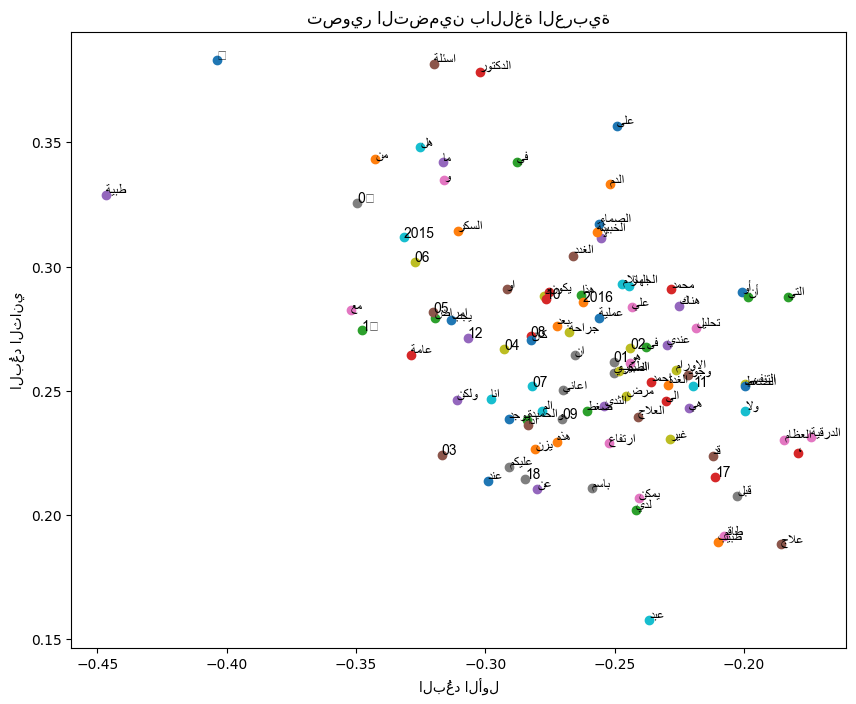

In [282]:
# import matplotlib.pyplot as plt

# embedding_layer = model.get_layer('embedding')
# weights = embedding_layer.get_weights()[0]

# word_index = tokenizer.word_index
# reverse_word_index = {v: k for k, v in word_index.items()}

# num_words_to_visualize = 100
# words_to_visualize = [reverse_word_index[i] for i in range(1, num_words_to_visualize + 1)]

# word_embeddings = weights[1:num_words_to_visualize + 1]

# plt.figure(figsize=(10, 8))
# for i, word in enumerate(words_to_visualize):
#     plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1])
#     plt.text(word_embeddings[i, 0], word_embeddings[i, 1], word)

# plt.title('Word Embeddings Visualization')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()


import matplotlib.pyplot as plt
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

arabic_font_path = 'font/NotoNaskhArabic-VariableFont_wght.ttf'

embedding_layer = model.get_layer('embedding')
weights = embedding_layer.get_weights()[0]

word_index = tokenizer.word_index
reverse_word_index = {v: k for k, v in word_index.items()}

num_words_to_visualize = 100
words_to_visualize = [reverse_word_index[i] for i in range(1, num_words_to_visualize + 1)]

word_embeddings = weights[1:num_words_to_visualize + 1]

plt.figure(figsize=(10, 8))

for i, word in enumerate(words_to_visualize):
    reshaped_word = arabic_reshaper.reshape(word)
    bidi_word = get_display(reshaped_word)

    plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1])
    plt.text(word_embeddings[i, 0], word_embeddings[i, 1], bidi_word, fontproperties='Arial')

plt.title('تصوير التضمين باللغة العربية')
plt.xlabel('البُعد الأول')
plt.ylabel('البُعد الثاني')
plt.show()


## [6.5]

In [283]:
def analogy(word_a, word_b, word_c, model, tokenizer):
    
    embeddings = model.get_layer('embedding').get_weights()[0]
    word_index = tokenizer.word_index

    if all(word in word_index for word in [word_a, word_b, word_c]):
        a_idx, b_idx, c_idx = [word_index[word] for word in [word_a, word_b, word_c]]
        vec_a, vec_b, vec_c = embeddings[a_idx], embeddings[b_idx], embeddings[c_idx]

        # Calculate the analogy vector
        analogy_vector = vec_b - vec_a + vec_c

        # Find the closest word in the embedding space
        closest_word_idx = np.argmin(np.linalg.norm(embeddings - analogy_vector, axis=1))

        # Get the word from the index
        closest_word = list(word_index.keys())[list(word_index.values()).index(closest_word_idx)]
        return closest_word
    else:
        return None

# Example usage:
for _ in range(5):
    word_a = "ضغط"
    word_b = "علاج"
    word_c = "التنفسي"

    result = analogy(word_a, word_b, word_c, model, tokenizer)
    print(f"{word_a} is to {word_b} as {word_c} is to {result}")


ضغط is to علاج as التنفسي is to علاج
ضغط is to علاج as التنفسي is to علاج
ضغط is to علاج as التنفسي is to علاج
ضغط is to علاج as التنفسي is to علاج
ضغط is to علاج as التنفسي is to علاج


# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1]

### [7.1.2]

## [7.2]

### [7.2.1]

### [7.2.2]

### [7.2.3]

### [7.2.4]

## [7.3]

## Extra [7.4]

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)